<a href="https://colab.research.google.com/github/cutiips/Master-Thesis/blob/main/CHM_rre150d0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Station of Chaumont

Station: CHM (Chaumont), precipitation dataset `rre150d0`

Daily total precipitation, from 6 UTC to 6 UTC (next day)

Temporal coverage: 31.12.1863 - 31.12.2023

Homogenized data: 1864 – 2009

Displayed data: 1864 - 2023

In [ ]:
## Packages for data processing
install.packages("dplyr")
library(dplyr)

install.packages("ggplot2")
library(ggplot2)

install.packages("zoo")
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [72]:
# Preprocessing
url <- "https://raw.githubusercontent.com/cutiips/Master-Thesis/main/CHM_rre150d0.txt"
CHM_P <- read.table(
  url,
  header = TRUE,
  sep    = ";",
  as.is  = FALSE,
  na.strings = c("-")
)


colnames(CHM_P)[2] <- "date"
colnames(CHM_P)[3] <- "precip"

CHM_P$date <- as.Date(as.character(CHM_P$date), format = "%Y%m%d")
CHM_P$year <- format(CHM_P$date, "%Y")
CHM_P$month <- format(CHM_P$date, "%m")
CHM_P$Year <- as.numeric(CHM_P$year)
CHM_P$month <- as.numeric(CHM_P$month)
CHM_P$precip <- as.numeric(CHM_P$precip)

In [73]:
# Check for missing values
sum(is.na(CHM_P))

[1] 31

## R10mm

In [ ]:
# Annual count of days with precipitation ≥ 10 mm
R10mm_days_CHM <- CHM_P[CHM_P$precip >= 10, ]
R10mm_summary_CHM <- aggregate(R10mm_days_CHM$precip,
  by = list(Year = R10mm_days_CHM$Year),FUN = length)
colnames(R10mm_summary_CHM)[2] <- "Count_R10mm_CHM"
R10mm_summary_CHM$Year <- as.numeric(R10mm_summary_CHM$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_R10mm_CHM <- lm(Count_R10mm_CHM ~ Year, data = R10mm_summary_CHM)
summary(model_R10mm_CHM)


Call:
lm(formula = Count_R10mm_CHM ~ Year, data = R10mm_summary_CHM)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.759  -5.776   0.190   5.410  22.701 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -103.40428   27.78897  -3.721 0.000275 ***
Year           0.07303    0.01429   5.109 9.22e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.351 on 158 degrees of freedom
Multiple R-squared:  0.1418,	Adjusted R-squared:  0.1364 
F-statistic:  26.1 on 1 and 158 DF,  p-value: 9.22e-07


In [ ]:
# Data homogenization period (CHM) : 1864 to 2009
R10mm_summary_CHM$Dataset <- ifelse(R10mm_summary_CHM$Year <= 2009,
  "homogenized","non-homogenized")
R10mm_homog_CHM <- R10mm_summary_CHM[R10mm_summary_CHM$Dataset == "homogenized", ]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


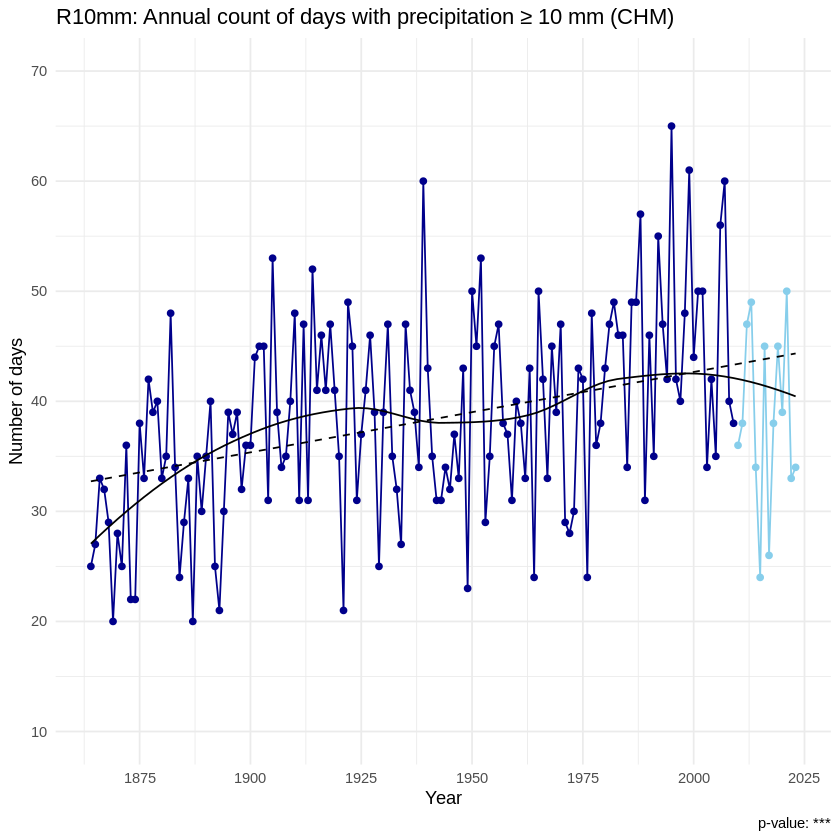

In [ ]:
# Graph with data homogenization period
ggplot(R10mm_summary_CHM, aes(x = Year, y = Count_R10mm_CHM)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "R10mm: Annual count of days with precipitation ≥ 10 mm (CHM)",
  x = "Year", y = "Number of days", caption = "p-value: ***") +
  scale_y_continuous(limits = c(10,70), breaks = seq(10,70, by = 10)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue","non-homogenized" = "skyblue")) +
  theme_minimal() +theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)
  # Mean
mean_R10mm_homog_CHM <- mean(R10mm_homog_CHM$Count_R10mm_CHM, na.rm = TRUE)

  # Usual range
range_R10mm_homog_CHM <- quantile(R10mm_homog_CHM$Count_R10mm_CHM,
  probs = c(0.05, 0.95),na.rm = TRUE)

## R95p

Total annual precipitation from days exceeding the 95th percentile, based on wet days (P ≥ 1 mm), during the 1961–1990 reference period

In [ ]:
# 95th percentile for wet days (1961–1990)
CHM_reference_period <- CHM_P[CHM_P$date >= as.Date("1961-01-01") & CHM_P$date <= as.Date("1990-12-31") &
  CHM_P$precip >= 1, ]
threshold_95_CHM <- quantile(CHM_reference_period$precip, 0.95, na.rm = TRUE)

In [ ]:
# Days above the 95th percentile, and compute annual total
R95p_summary_CHM <- CHM_P[CHM_P$precip >= 1 & CHM_P$precip > threshold_95_CHM, ]
R95p_summary_CHM <- aggregate(R95p_summary_CHM$precip,
  by = list(Year = R95p_summary_CHM$year),FUN = sum, na.rm = TRUE)
colnames(R95p_summary_CHM)[2] <- "Total_R95p_CHM"
R95p_summary_CHM$Year <- as.numeric(R95p_summary_CHM$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_R95p_CHM <- lm(Total_R95p_CHM ~ Year, data = R95p_summary_CHM)
summary(model_R95p_CHM)


Call:
lm(formula = Total_R95p_CHM ~ Year, data = R95p_summary_CHM)

Residuals:
    Min      1Q  Median      3Q     Max 
-5522.8 -2112.0   -68.6  1566.4  7212.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -16567.178   8576.585  -1.932  0.05519 . 
Year            13.070      4.412   2.963  0.00352 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2577 on 158 degrees of freedom
Multiple R-squared:  0.05263,	Adjusted R-squared:  0.04663 
F-statistic: 8.777 on 1 and 158 DF,  p-value: 0.003522


In [ ]:
# Data homogenization period (CHM) : 1864 to 2010
R95p_summary_CHM$Dataset <- ifelse(R95p_summary_CHM$Year <= 2009,
                                   "homogenized","non-homogenized")
R95p_homog_CHM <- R95p_summary_CHM[R95p_summary_CHM$Dataset == "homogenized", ]

Warning message:
“Removed 160 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 160 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range
(`geom_point()`).”


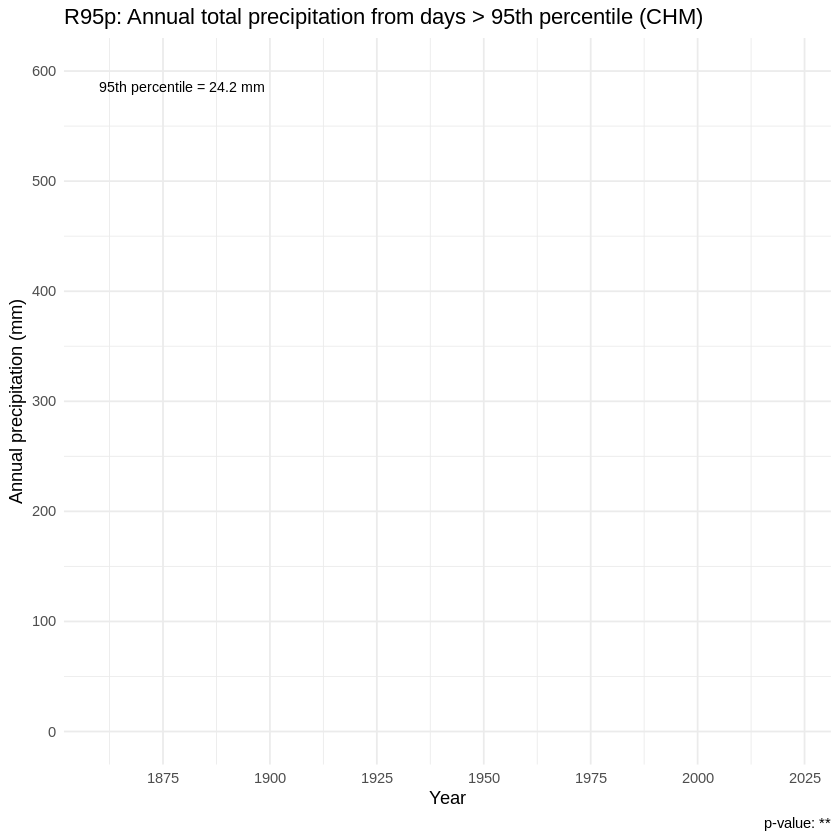

In [ ]:
# Graph with data homogenization period
ggplot(R95p_summary_CHM, aes(x = Year, y = Total_R95p_CHM)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "R95p: Annual total precipitation from days > 95th percentile (CHM)",
  x = "Year", y = "Annual precipitation (mm)", caption = "p-value: **") +
  scale_y_continuous(limits = c(0, 600), breaks = seq(0, 600, by = 100)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none") +
  annotate("text", x = 1860, y = 590, label = "95th percentile = 24.2 mm", hjust = 0, vjust = 1, size = 3, color = "black")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_R95p_homog_CHM <- mean(R95p_homog_CHM$Total_R95p_CHM, na.rm = TRUE)

# Range
range_R95p_homog_CHM <- quantile(R95p_homog_CHM$Total_R95p_CHM,
  probs = c(0.05, 0.95), na.rm = TRUE)

## Complementary approach : R95p days

Annual count of days with precipitation > 95th percentile

Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period  

In [ ]:
# 95th percentile for wet days (1961–1990)
CHM_reference_period <- CHM_P[CHM_P$date >= as.Date("1961-01-01") & CHM_P$date <= as.Date("1990-12-31") &
                                CHM_P$precip >= 1, ]
threshold_95_days_CHM <- quantile(CHM_reference_period$precip, 0.95, na.rm = TRUE)

In [ ]:
# Number of days per year exceeding this threshold
R95p_days_summary_CHM <- CHM_P[CHM_P$precip > threshold_95_days_CHM, ]
R95p_days_summary_CHM <- aggregate(R95p_days_summary_CHM$precip,
                                   by = list(Year = R95p_days_summary_CHM$year),FUN = length)
colnames(R95p_days_summary_CHM)[2] <- "Days_R95p_CHM"
R95p_days_summary_CHM$Year <- as.numeric(R95p_days_summary_CHM$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_R95p_days_CHM <- lm(Days_R95p_CHM ~ Year, data = R95p_days_summary_CHM)
summary(model_R95p_days_CHM)


Call:
lm(formula = Days_R95p_CHM ~ Year, data = R95p_days_summary_CHM)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6222  -3.9649  -0.1541   3.0123  13.8363 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -31.922204  16.467974  -1.938  0.05435 . 
Year          0.025146   0.008471   2.969  0.00346 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.949 on 158 degrees of freedom
Multiple R-squared:  0.05283,	Adjusted R-squared:  0.04683 
F-statistic: 8.812 on 1 and 158 DF,  p-value: 0.003458


In [ ]:
# Data homogenization period (CHM) : 1864 to 2010
R95p_days_summary_CHM$Dataset <- ifelse(R95p_days_summary_CHM$Year <= 2009,
                                        "homogenized","non-homogenized")
R95p_days_homog_CHM <- R95p_days_summary_CHM[R95p_days_summary_CHM$Dataset == "homogenized", ]

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”


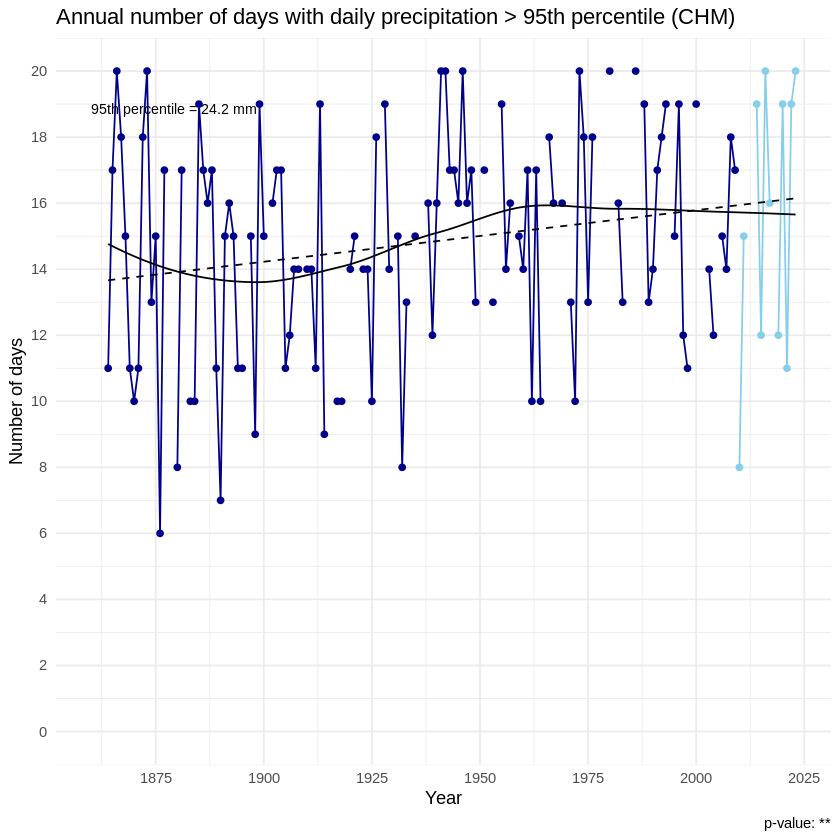

In [ ]:
# Graph with data homogenization period
ggplot(R95p_days_summary_CHM, aes(x = Year, y = Days_R95p_CHM)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "Annual number of days with daily precipitation > 95th percentile (CHM)",
       x = "Year", y = "Number of days",
       caption = "p-value: **") +
  scale_y_continuous(limits = c(0, 20), breaks = seq(0, 20, by = 2)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none") +
  annotate("text", x = 1860, y = 19,
           label = "95th percentile = 24.2 mm", hjust = 0, vjust = 1, size = 3, color = "black")

In [ ]:
# Summary statistics (homogenized data only)
# Mean
mean_R95p_days_homog_CHM <- mean(R95p_days_homog_CHM$Days_R95p_CHM, na.rm = TRUE)

# Range
range_R95p_days_homog_CHM <- quantile(R95p_days_homog_CHM$Days_R95p_CHM,
  probs = c(0.05, 0.95),na.rm = TRUE)

## Rx1day

In [ ]:
# Annual maximum of daily precipitation
Rx1day_summary_CHM <- aggregate(CHM_P$precip,
  by = list(Year = CHM_P$year), FUN = max, na.rm = TRUE)
colnames(Rx1day_summary_CHM)[2] <- "Yearly_Max_Rx1day_CHM"
Rx1day_summary_CHM$Year <- as.numeric(Rx1day_summary_CHM$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_Rx1day_CHM <- lm(Yearly_Max_Rx1day_CHM ~ Year, data = Rx1day_summary_CHM)
summary(model_Rx1day_CHM)


Call:
lm(formula = Yearly_Max_Rx1day_CHM ~ Year, data = Rx1day_summary_CHM)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8274  -0.5090   0.5733   1.4226   3.3559 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.231e+02  7.331e+00  71.356   <2e-16 ***
Year        7.639e-03  3.771e-03   2.026   0.0445 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.203 on 158 degrees of freedom
Multiple R-squared:  0.02532,	Adjusted R-squared:  0.01915 
F-statistic: 4.104 on 1 and 158 DF,  p-value: 0.04447


In [ ]:
# Data homogenization period (CHM) : 1864 to 2010
Rx1day_summary_CHM$Dataset <- ifelse(Rx1day_summary_CHM$Year <= 2009,
                                     "homogenized","non-homogenized")
Rx1day_homog_CHM <- Rx1day_summary_CHM[Rx1day_summary_CHM$Dataset == "homogenized", ]

Warning message:
“Removed 160 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 160 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range
(`geom_point()`).”


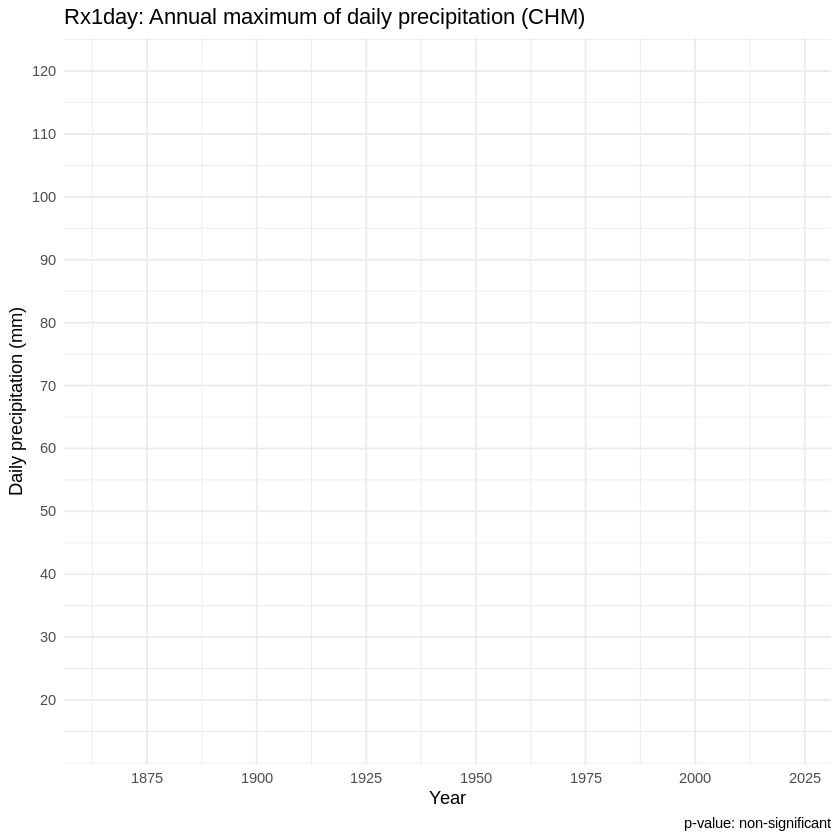

In [ ]:
# Graph with data homogenization period
ggplot(Rx1day_summary_CHM, aes(x = Year, y = Yearly_Max_Rx1day_CHM)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "Rx1day: Annual maximum of daily precipitation (CHM)",
       x = "Year",y = "Daily precipitation (mm)",
       caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(15, 120), breaks = seq(20, 120, by = 10)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)
# Mean
mean_Rx1day_homog_CHM <- mean(Rx1day_homog_CHM$Yearly_Max_Rx1day_CHM, na.rm = TRUE)

# Range
range_Rx1day_homog_CHM <- quantile(Rx1day_homog_CHM$Yearly_Max_Rx1day_CHM,
  probs = c(0.05, 0.95),na.rm = TRUE)

## CWD
Maximum number of consecutive wet days

In [ ]:
# Binary wet day indicator
CHM_P$Wet_Day <- ifelse(CHM_P$precip >= 1, 1, 0)

In [ ]:
# Create the loop to compute the maximum wet spell length
CWD_summary_CHM <- data.frame(Year = unique(CHM_P$year), Max_CWD_CHM = NA)
for (i in seq_along(CWD_summary_CHM$Year))
  {year_data <- CHM_P[CHM_P$year == CWD_summary_CHM$Year[i], ]
  rle_wet <- rle(year_data$Wet_Day)
  CWD_summary_CHM$Max_CWD_CHM[i] <- if (any(rle_wet$values == 1))
  {max(rle_wet$lengths[rle_wet$values == 1], na.rm = TRUE)}
  else {0}}
CWD_summary_CHM$Year <- as.numeric(CWD_summary_CHM$Year)

In [ ]:
# Linear trend analysis (based on all availible data)
model_CWD_CHM <- lm(Max_CWD_CHM ~ Year, data = CWD_summary_CHM)
summary(model_CWD_CHM)


Call:
lm(formula = Max_CWD_CHM ~ Year, data = CWD_summary_CHM)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2475 -0.2451 -0.2425 -0.2399  0.7600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.653e+02  1.438e+00 254.119   <2e-16 ***
Year        -4.834e-05  7.395e-04  -0.065    0.948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.432 on 158 degrees of freedom
Multiple R-squared:  2.704e-05,	Adjusted R-squared:  -0.006302 
F-statistic: 0.004273 on 1 and 158 DF,  p-value: 0.948


In [ ]:
# Data homogenization period (CHM) : 1864 to 2010
CWD_summary_CHM$Dataset <- ifelse(CWD_summary_CHM$Year <= 2009,
                                  "homogenized","non-homogenized")
CWD_homog_CHM <- CWD_summary_CHM[CWD_summary_CHM$Dataset == "homogenized", ]

Warning message:
“Removed 160 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 160 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range
(`geom_point()`).”


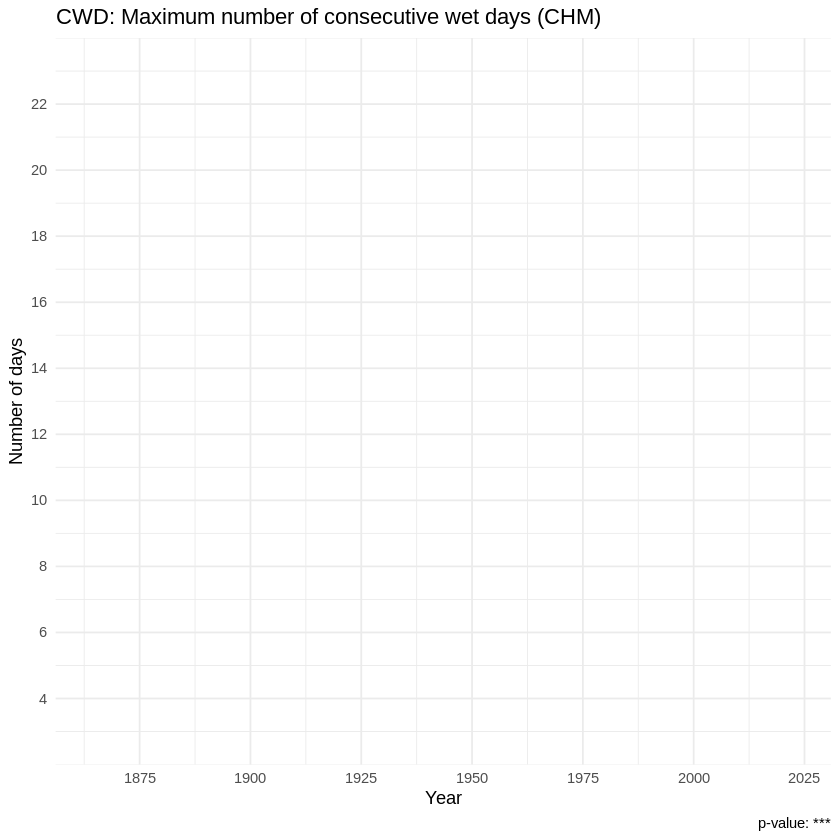

In [ ]:
# Graph with data homogenization period
ggplot(CWD_summary_CHM, aes(x = Year, y = Max_CWD_CHM)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "CWD: Maximum number of consecutive wet days (CHM)",
       x = "Year",y = "Number of days",caption = "p-value: ***") +
  scale_y_continuous(limits = c(3, 23), breaks = seq(4, 23, by = 2)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

In [ ]:
# Summary statistics (homogenized data only)

# Mean
mean_CWD_homog_CHM <- mean(CWD_homog_CHM$Max_CWD_CHM, na.rm = TRUE)

# Range
range_CWD_homog_CHM <- quantile(CWD_homog_CHM$Max_CWD_CHM,
  probs = c(0.05, 0.95),  na.rm = TRUE)